# Final Exercise III False Asteroids: Sample Solutions

## What was the final exercise about?
There are 16 areas (boards) that Dr. Ryoko needs to clear, each of which has 6 noise clusters that correspond to an asteroid in "Asteroids puzzle". However, there happens to be one area that can not be cleared with three laser shots! Use Grover's algorithm you learned in Weeks 1 & 2 to find that one area (board)!

- The noises are placed on a grid.
- The objective is to destroy all the noise clusters by shooting laser beams: either vertically or horizontally.
- The size of the board is 4 $\times$ 4.
- The number of noise clusters are 6 and the number of laser shots you can shoot is 3 for each boards.
- No boards in our problem sets are solvable with 0, 1, 2 lasers.




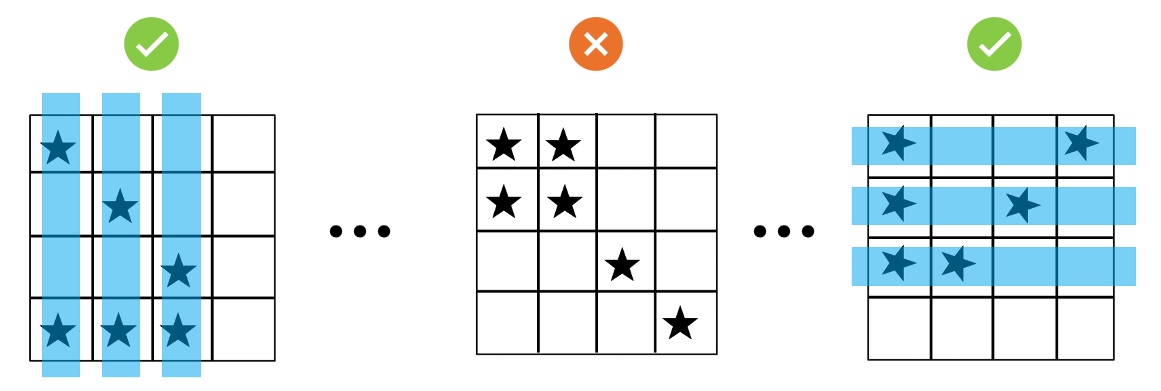

In [1]:
from IPython.display import Image, display
Image('ex_3_overview.png')

In [2]:
problem_set = \
    [[['0', '2'], ['1', '0'], ['1', '2'], ['1', '3'], ['2', '0'], ['3', '3']],
    [['0', '0'], ['0', '1'], ['1', '2'], ['2', '2'], ['3', '0'], ['3', '3']],
    [['0', '0'], ['1', '1'], ['1', '3'], ['2', '0'], ['3', '2'], ['3', '3']],
    [['0', '0'], ['0', '1'], ['1', '1'], ['1', '3'], ['3', '2'], ['3', '3']],
    [['0', '2'], ['1', '0'], ['1', '3'], ['2', '0'], ['3', '2'], ['3', '3']],
    [['1', '1'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '1'], ['3', '3']],
    [['0', '2'], ['0', '3'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '3']],
    [['0', '0'], ['0', '3'], ['1', '2'], ['2', '2'], ['2', '3'], ['3', '0']],
    [['0', '3'], ['1', '1'], ['1', '2'], ['2', '0'], ['2', '1'], ['3', '3']],
    [['0', '0'], ['0', '1'], ['1', '3'], ['2', '1'], ['2', '3'], ['3', '0']],
    [['0', '1'], ['0', '3'], ['1', '2'], ['1', '3'], ['2', '0'], ['3', '2']],
    [['0', '0'], ['1', '3'], ['2', '0'], ['2', '1'], ['2', '3'], ['3', '1']],
    [['0', '1'], ['0', '2'], ['1', '0'], ['1', '2'], ['2', '2'], ['2', '3']],
    [['0', '3'], ['1', '0'], ['1', '3'], ['2', '1'], ['2', '2'], ['3', '0']],
    [['0', '2'], ['0', '3'], ['1', '2'], ['2', '3'], ['3', '0'], ['3', '1']],
    [['0', '1'], ['1', '0'], ['1', '2'], ['2', '2'], ['3', '0'], ['3', '1']]]

In [3]:
def draw_asteroids(problem):
    for i in range(4):
        for j in range(4):
            if [str(i),str(j)] in problem:
                print("X ", end='')
            else:
                print(". ", end='')
        print("")

for i, problem in enumerate(problem_set):
    print("--", i,"---")
    draw_asteroids(problem)

-- 0 ---
. . X . 
X . X X 
X . . . 
. . . X 
-- 1 ---
X X . . 
. . X . 
. . X . 
X . . X 
-- 2 ---
X . . . 
. X . X 
X . . . 
. . X X 
-- 3 ---
X X . . 
. X . X 
. . . . 
. . X X 
-- 4 ---
. . X . 
X . . X 
X . . . 
. . X X 
-- 5 ---
. . . . 
. X X . 
X X . . 
. X . X 
-- 6 ---
. . X X 
. . X . 
X X . . 
. . . X 
-- 7 ---
X . . X 
. . X . 
. . X X 
X . . . 
-- 8 ---
. . . X 
. X X . 
X X . . 
. . . X 
-- 9 ---
X X . . 
. . . X 
. X . X 
X . . . 
-- 10 ---
. X . X 
. . X X 
X . . . 
. . X . 
-- 11 ---
X . . . 
. . . X 
X X . X 
. X . . 
-- 12 ---
. X X . 
X . X . 
. . X X 
. . . . 
-- 13 ---
. . . X 
X . . X 
. X X . 
X . . . 
-- 14 ---
. . X X 
. . X . 
. . . X 
X X . . 
-- 15 ---
. X . . 
X . X . 
. . X . 
X X . . 


## Sample solutions
There are a lot of clever ways to solve this exercise. In fact, the top three participants have each used different algorithms in their code. If you are interested in those approaches, please go to check [the top participants' submissions](https://github.com/qiskit-community/IBMQuantumChallenge2020/tree/main/submissions). 

In this notebook, we introduce 2 approachs among them. The first approach is based on converting the exercise into a vertex cover problem, and then, solving the vertex cover problem with double-Grover as written in [Ryoko's hint](https://github.com/qiskit-community/IBMQuantumChallenge2020/blob/main/hints/hint_3.pdf). The second one uses the properties of unsolvable boards to solve the exercise. **The second approach is simpler and easier to understand. If you feel the first approach is difficult, you can skip it and read the second approach.**
 (Just remember to look at these solution literally as a sample and not as the only correct answer.)


### Approach 1: Solving the vertex cover problems with double-Grover

In this approach, we convert the exercise into a vertex cover problem, and then, we solve the vertex cover problem with double-Grover like we did in exercise 2-b. This approach is general and naive. It takes higher cost than the second approach. 


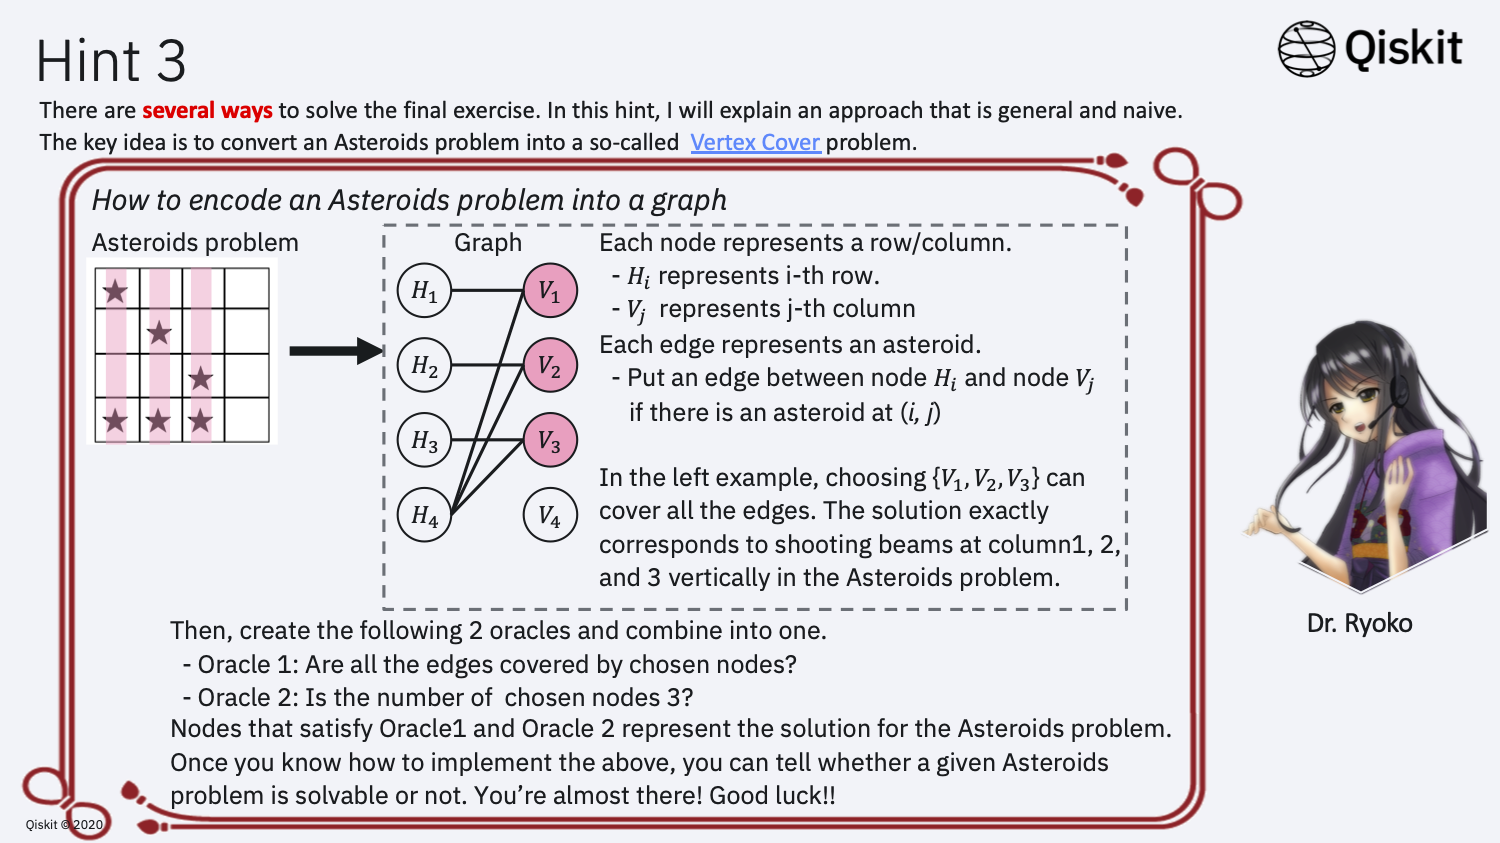

In [4]:
from IPython.display import Image, display
Image('Hint_3.png')

In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

In the first approach, we need the following two oracles.

1. Are all the edges covered by chosen nodes?
2. Is the number of chosen nodes 3?

Both oracles need to count the number of covered edges/chosen nodes, respectively. For this purpose, we can use a counter used in week 2-b to count '1's. Note that no boards in our problem sets are solvable with 0, 1, 2 lasers.

In [6]:
# define a counter used in week2-b
def counter(qc, qr, auxiliary):
    qc.mcx(qr[0:3], qr[3], auxiliary)
    qc.ccx(qr[0], qr[1], qr[2])
    qc.cx(qr[0], qr[1])

def reverse_counter(qc, qr, auxiliary):
    qc.cx(qr[0], qr[1])
    qc.ccx(qr[0], qr[1], qr[2])
    qc.mcx(qr[0:3], qr[3], auxiliary)

#### Loading problems in the Gray code order
There is a small trick to reduce the cost for loading problems. The trick is the order of loading problems. We load the problems in the [Gray code](https://en.wikipedia.org/wiki/Gray_code) order instead of the normal ascending order. By doing so, we can reduce the number of X gates used to change the polarity before and after mcx gates.

The following circuit is an example of loading problems in the ascending order. Note that we used a single mcx gate to represent loading parts for ease of explanation. We need to construct appropriate circuits to load problems in actual cases.

In [7]:
# An example of the ascending_order_qc
ascending_order_qc = QuantumCircuit(5)
for i in range(16):
    for k in range(4):
        if not i & (1<<k):
            ascending_order_qc.x(3-k)
    ascending_order_qc.mcx([0, 1, 2, 3], 4)
    for k in range(4):
        if not i & (1<<k):
            ascending_order_qc.x(3-k)
    ascending_order_qc.barrier()
ascending_order_qc.draw('mpl')

The following circuit is an example of loading problems in the Gray code order. As you can see, the number of necessary X gates becomes lower if we load the problems in the Gray code order. Note that we used a single mcx gate to represent loading parts for ease of explanation as we did in the above example. 

In [8]:
gray_code_order = ['1111', '1110', '1010', '1011', '1001', '1000', '0000', '0001', '0011', '0010', '0110', '0111', '0101', '0100', '1100', '1101']
[int(i, 2)for i in gray_code_order]

[15, 14, 10, 11, 9, 8, 0, 1, 3, 2, 6, 7, 5, 4, 12, 13]

In [9]:
def insert_x_dif(qc, address, cur, last):
    for i in range(4):
        if cur[i] != last[i]:
            qc.x(address[i])

In [10]:
gray_code_order_qc = QuantumCircuit(5)
last = '1111'
address = [0, 1, 2, 3]
for k in range(16):
    cur = gray_code_order[k]
    insert_x_dif(gray_code_order_qc, address, cur, last)
    gray_code_order_qc.mcx([0, 1, 2, 3], 4)
    gray_code_order_qc.barrier()
    last = cur
insert_x_dif(gray_code_order_qc, address, '1111', last)
gray_code_order_qc.draw('mpl')

**In the first approach, we encode each laser beam to a node (a qubit in a quantum circuit). We also encode each noise cluster to an edge (quantum gates in a quantum circuit). **

#### Oracle 1: Are all the edges covered by chosen nodes?
For the vertex cover, we can check whether an edge is covered or not by taking OR of the endpoint node of the edge. Note that the vertical/horizontal laser beams and noise clusters are encoded to nodes and edges, respectively. So, Taking OR corresponds to checking a noise cluster is covered one of a vertical or horizontal laser beam. For example, noise cluster ['0', '1'] is covered by a horizontal laser beam at the first row or a vertical laser beam at the second column by taking OR (Note that the index starts from 0).

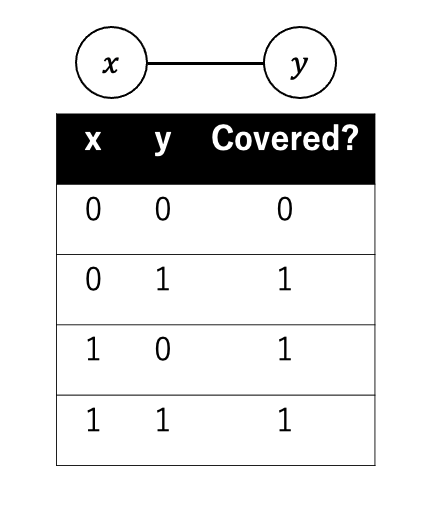

In [11]:
from IPython.display import Image, display
Image('OR_cover_edge.png')

An OR gate can be implemented with 2 CX gates and 1 CCX gate in a quantum circuit as the followings.

In [12]:
# An OR gate implementation
# x, y, and covered are represented by qubit 0, 1, and 2, respectively. 
or_qc = QuantumCircuit(3)
or_qc.cx(1, 2)
or_qc.cx(0, 2)
or_qc.ccx(0, 1, 2)
or_qc.draw('mpl')

Now, we can check whether an edge (a noise cluster) is covered or not. For multiple edges, we can use counter to count the number of edges covered. If the number of edges covered equals to the total number of the edges, we can say all of the edges is covered.
 So, we can know whether all of the 6 edges (noise clusters) is covered or not with counters and OR gates. Now, let's make the first oracle to check it.

In [13]:
def vertex_cover_oracle1(qc, problem_set, address, lasers, counter_reg, output, auxiliary):
    gray_code_order = ['1111', '1110', '1010', '1011', '1001', '1000', '0000', '0001', '0011', '0010', '0110', '0111', '0101', '0100', '1100', '1101']

    last = '1111'
    # Load problems in the Gray code order.
    for i in range(6):
        for k in range(16):
            cur = gray_code_order[k]
            insert_x_dif(qc, address, cur, last)
            problem = problem_set[int(cur, 2)]
            row = int(problem[i][0])
            column = int(problem[i][1])

            # Check whether corresponded vertical (or horizontal) laser covers the noise cluster
            # To prevent canceling out for the case both corresponded lasers covers the noise cluster, we apply an OR function. 
            h_control=address[:]+[lasers[row]]
            v_control=address[:]+[lasers[column+4]]
            vh_control=address[:]+[lasers[column+4]]+[lasers[row]]

            qc.mcx(v_control, counter_reg[0], auxiliary)
            qc.mcx(h_control, counter_reg[0], auxiliary)
            qc.mcx(vh_control, counter_reg[0], auxiliary)
            last = cur

        # Use a counter to count the number of the covered noise clusters.
        counter(qc, counter_reg[:], auxiliary)
        
        for k in range(16):
            cur = gray_code_order[k]
            insert_x_dif(qc, address, cur, last)
            problem = problem_set[int(cur, 2)]
            row = int(problem[i][0])
            column = int(problem[i][1])

            # Check whether corresponded vertical (or horizontal) laser covers the noise cluster
            # To prevent canceling out for the case both corresponded lasers covers the noise cluster, we apply an OR function. 
            h_control=address[:]+[lasers[row]]
            v_control=address[:]+[lasers[column+4]]
            vh_control=address[:]+[lasers[column+4]]+[lasers[row]]

            qc.mcx(v_control, counter_reg[0], auxiliary)
            qc.mcx(h_control, counter_reg[0], auxiliary)
            qc.mcx(vh_control, counter_reg[0], auxiliary)
            last = cur


    #Store 1 at output[0] if the calculation result is 6 (means that all the noise clusters are is covered)
    qc.x(counter_reg[1])
    qc.mcx(counter_reg[1:], output[0], auxiliary)
    qc.x(counter_reg[1])

    for i in range(6):
        for k in range(16):
            cur = gray_code_order[k]
            insert_x_dif(qc, address, cur, last)
            problem = problem_set[int(cur, 2)]
            row = int(problem[i][0])
            column = int(problem[i][1])

            # Check whether corresponded vertical (or horizontal) laser covers the noise cluster
            # To prevent canceling out for the case both corresponded lasers covers the noise cluster, we apply an OR function. 
            h_control=address[:]+[lasers[row]]
            v_control=address[:]+[lasers[column+4]]
            vh_control=address[:]+[lasers[column+4]]+[lasers[row]]

            qc.mcx(v_control, counter_reg[0], auxiliary)
            qc.mcx(h_control, counter_reg[0], auxiliary)
            qc.mcx(vh_control, counter_reg[0], auxiliary)
            last = cur

        # Use a counter to count the number of the covered noise clusters.
        reverse_counter(qc, counter_reg[:], auxiliary)

        for k in range(16):
            cur = gray_code_order[k]
            insert_x_dif(qc, address, cur, last)
            problem = problem_set[int(cur, 2)]
            row = int(problem[i][0])
            column = int(problem[i][1])

            # Check whether corresponded vertical (or horizontal) laser covers the noise cluster
            # To prevent canceling out for the case both corresponded lasers covers the noise cluster, we apply an OR function. 
            h_control=address[:]+[lasers[row]]
            v_control=address[:]+[lasers[column+4]]
            vh_control=address[:]+[lasers[column+4]]+[lasers[row]]

            qc.mcx(v_control, counter_reg[0], auxiliary)
            qc.mcx(h_control, counter_reg[0], auxiliary)
            qc.mcx(vh_control, counter_reg[0], auxiliary)
            last = cur
        
    insert_x_dif(qc, address, '1111', last)

With the above oracle, we can check whether all the nodes is covered or not.

#### Oracle 2: Is the number of chosen nodes 3?
We use a counter for this purpose as well. It can be simply implemented by putting each node to the input of the counter. Then, we compare the result of the counter with '011' (3 in binary). If they are equal, we can say the number of laser beams is 3.

In [14]:
def count_lasers_oracl2(qc, lasers, counter_reg, output, auxiliary):
    #Count the number of the laser beams
    for laser in lasers:
        qc.cx(laser, counter_reg[0])
        counter(qc, counter_reg[:], auxiliary)
        qc.cx(laser, counter_reg[0])

    # Store 1 at output[1] if the number of the laser beams used is 3
    qc.x(counter_reg[3])
    qc.mcx(counter_reg[1:], output[1], auxiliary)
    qc.x(counter_reg[3]) 
    
    #Uncomupte counting the number of the laser beams
    for laser in lasers:
        qc.cx(laser, counter_reg[0])
        reverse_counter(qc, counter_reg[:], auxiliary)
        qc.cx(laser, counter_reg[0])

By combining Oracle 1 and Oracle 2 in the above, we can make an oracle that check whether all the 6 noise clusters can be destroyed with three laser beams. With the oracle and a diffusion circuit, we can execute Grover's algorithm for the problem represented by its oracle. 



In [15]:
def diffusion(qc, qr, auxiliary):
    qc.h(qr)
    qc.x(qr)
    qc.h(qr[-1])
    qc.mcx(qr[0:-1], qr[-1], auxiliary)
    qc.h(qr[-1])
    qc.x(qr)
    qc.h(qr)

Wait...the actual problem is to find **the board that can not be cleared with three laser beams**. How can we solve it?

We use double-Grover as we did in week2-b. The structure is as follows.

**The double-Grover for the final exercise**

1. Apply the Grover's algorithm with the oracle to find the assignment of laser beams for each boards (This is the inner-Grover for our approach)
   - Diffusion is applied to the registers of laser beams.
2. Apply the oracle and flip the phase of solvable boards. (Since only one board is unsolvable, the phase of the unsolvable board will be different from the solvable boards. Thus, if we apply diffusion to its state, we can increase only the amplitude of the unsolvable board)
3. Apply the inverse of the inner-Grover.
    - It means that We apply diffusion before the oracle. So, the iterations of the inverse of the inner-Grover looks like Diffusion -> Oracle -> Diffusion -> Oracle...
4. Apply diffusion to the address qubits.

The whole process is an iteration of the outer-Grover. We have all the parts, so let's build it!
 

#### Quantum Circuit for approach 1

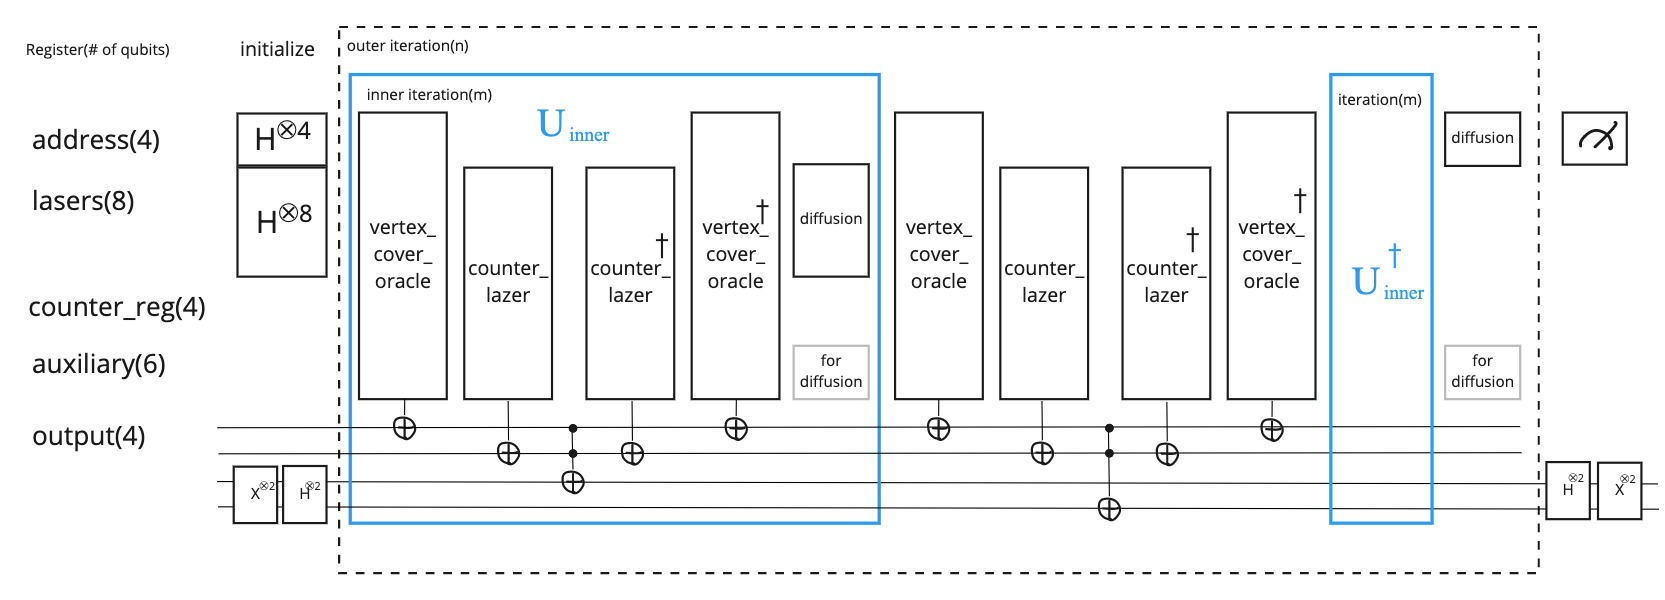

In [1]:
Image('final_circuit_1.png')

In [16]:
def week3_ans_func(problem_set):
    address = QuantumRegister(4, 'address')
    lasers = QuantumRegister(8, 'lasers')
    counter_reg = QuantumRegister(4, 'counter_reg')
    output = QuantumRegister(4, 'output')
    auxiliary = QuantumRegister(6, 'auxiliary')
    result = ClassicalRegister(4)

    qc = QuantumCircuit(address, lasers, counter_reg, output, auxiliary, result)

    # initialize address, lasers, and output registers.
    qc.h(address[:])
    qc.h(lasers[:])
    qc.x(output[2:4])
    qc.h(output[2:4])

    # Double-Grover for the vertex cover
    n = 1  # num of outer-Grover's iterations
    m = 10  # num of inner-Grover's iterations
    # Outer-Grover
    for i in range(n):
        # Inner-Grover
        for j in range(m):
            # Oracle 1. The result is stored into output[0]
            vertex_cover_oracle1(qc, problem_set, address, lasers, counter_reg, output, auxiliary)
            #Oracle 2. The result if stored into output[1]
            count_lasers_oracl2(qc, lasers, counter_reg, output, auxiliary)
            # Take AND of the results of Oracle1 and Oracle2
            qc.ccx(output[0], output[1], output[2])
            # Uncompute the registers used in calculation
            count_lasers_oracl2(qc, lasers, counter_reg, output, auxiliary)
            vertex_cover_oracle1(qc, problem_set, address, lasers, counter_reg, output, auxiliary)
            # Diffusion of inner-Grover
            diffusion(qc, lasers, auxiliary)

        # Outer Grover's oracle
        # Oracle 1. The result is stored into output[0]
        vertex_cover_oracle1(qc, problem_set, address, lasers, counter_reg, output, auxiliary)
        # Oracle 2. The result if stored into output[1]
        count_lasers_oracl2(qc, lasers, counter_reg, output, auxiliary)
        # At this time, we store the result of AND into output[3]
        qc.ccx(output[0], output[1], output[3])
        # Uncompute the registers used in calculation
        count_lasers_oracl2(qc, lasers, counter_reg, output, auxiliary)
        vertex_cover_oracle1(qc, problem_set, address, lasers, counter_reg, output, auxiliary)

        # Apply the inverse of inner-Grover
        for j in range(m):
            # Diffusion of inner-Grover
            diffusion(qc, lasers, auxiliary)
            # Oracle 1. The result is stored into output[0]
            vertex_cover_oracle1(qc, problem_set, address, lasers, counter_reg, output, auxiliary)
            # Oracle 2. The result if stored into output[1]
            count_lasers_oracl2(qc, lasers, counter_reg, output, auxiliary)
            # Take AND of the results of Oracle and Oracle2
            qc.ccx(output[0], output[1], output[2])
            # Uncompute the registers used in calculation
            count_lasers_oracl2(qc, lasers, counter_reg, output, auxiliary)
            vertex_cover_oracle1(qc, problem_set, address, lasers, counter_reg, output, auxiliary)
        # Diffusion of outer-Grover
        diffusion(qc, address, auxiliary)

    qc.h(output[2:4])
    qc.x(output[2:4])

    qc.measure(address, result[0:4])

    return qc


If the grader does not work correctly in your environment, please execute your function with `problem_set`, and then, call `ibmq_qasm_simulator` manually. How to manually call the `ibmq_qasm_simulator` is written at the bottome of this notebook.

In [21]:
!pip install -I git+https://github.com/qiskit-community/IBMQuantumChallenge2020-Grader.git

  Cloning https://github.com/qiskit-community/IBMQuantumChallenge2020-Grader.git to /private/var/folders/vz/b1fyphrd1031ddfd1xdhjq_m0000gn/T/pip-req-build-zy6g0gw5
  Using cached numpy-1.19.4-cp38-cp38-macosx_10_9_x86_64.whl (15.3 MB)
  Using cached qiskit-0.23.1.tar.gz (4.1 kB)
  Using cached requests-2.25.0-py2.py3-none-any.whl (61 kB)
  Using cached qiskit_terra-0.16.1-cp38-cp38-macosx_10_9_x86_64.whl (7.8 MB)
  Using cached qiskit_aer-0.7.1-cp38-cp38-macosx_10_9_x86_64.whl (8.1 MB)
  Using cached qiskit_ibmq_provider-0.11.1-py3-none-any.whl (195 kB)
  Using cached qiskit_ignis-0.5.1-py3-none-any.whl (204 kB)
  Using cached qiskit_aqua-0.8.1-py3-none-any.whl (2.1 MB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Using cached urllib3-1.26.2-py2.py3-none-any.whl (136 kB)
  Using cached certifi-2020.12.5-py2.py3-none-any.whl (147 kB)
  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
  Using cached dill-0.3.3-py2.py3-none-any.whl (81 kB)
  Using cached sympy-1.7-py3-n

In [17]:
from qc_grader import grade_ex3, prepare_ex3
# Execute your circuit with following prepare_ex3() function.
# The prepare_ex3() function works like the execute() function with only QuantumCircuit as an argument.
job = prepare_ex3(week3_ans_func)

Running week3_ans_func...
Computing cost...
Starting experiments. Please wait...
You may monitor the job (id: 5fd4610410ba7c001aa17103) status and proceed to grading when it successfully completes.


In [18]:
result = job.result()
counts = result.get_counts()
# The following code is just to align the execution result.
original_problem_set_counts = [(p[0][::-1], p[1]) for p in sorted(counts[0].items(), key=lambda x:x[1], reverse=True)]
original_problem_set_counts

[('1010', 379),
 ('0001', 56),
 ('0110', 48),
 ('1000', 46),
 ('1101', 46),
 ('1100', 44),
 ('1001', 44),
 ('1011', 44),
 ('1111', 44),
 ('1110', 41),
 ('0101', 39),
 ('0010', 37),
 ('0011', 36),
 ('0000', 33),
 ('0100', 33),
 ('0111', 30)]

In [19]:
grade_ex3(job)

Grading your answer. Please wait...

Congratulations ðŸŽ‰! Your answer is correct.
Your score is 66630598.
The lower your score the better!
Feel free to submit your answer.


The circuit successfully found the correct answer! The circuit uses 24 qubits, and its cost is 66,630,598. It's kind of big though.

### Approach 2: Finding permutation matrices on boards

In the second approach, we use the property of unsolvable boards. As a lot of participants noticed in the Quantum Challenge, there is the property of unsolvable boards and we can make an oracle based on the property.

#### The property of unsolvable boards
First, let's see the property of unsolvable boards. The following board is unsolvable with three laser shots. Why? The key is the noise clusters on the diagonal of the board. They are `['0', '0'], ['1', '1'], ['2', '2'], ['3', '3']` (You can ignore `['3', '0'], ['3', '1']` in this discussion). To clear noise cluster `['0', '0']`, we need to shoot a laser beam at 0-th row or/and 0-th column. Similary, to clear noise cluster `['1', '1']`, we need to shoot a laser beam at 1-st row or/and 1-st column. Also, for `['2', '2']` and `['3', '3']`, we need to shoot laser beams at 2-nd row or/and 2-nd column, and 3-rd row or/and 3-rd column, respectively. So, there is no overlap of laser beams to clear these four noise clusters. Thus, we need at least four laser beams to clear them.

In [20]:
unsolvable_board1 = [['0', '0'], ['1', '1'], ['2', '2'], ['3', '3'], ['3', '0'], ['3', '1']]
draw_asteroids(unsolvable_board1)

X . . . 
. X . . 
. . X . 
X X . X 


More generally, it is impossible to clear an assignment that can be created by swapping rows or/and columns of the diagonal board with three laser beams. The following assignments are two examples of unsolvable assignments. Note that the assignments of the rest of two asteroids is not essential. You can put the rest of two asteroids on any places. 


In [21]:
unsolvable_board2 = [['0', '1'], ['1', '2'], ['2', '3'], ['3', '0']]
draw_asteroids(unsolvable_board2)
print('-------')
unsolvable_board3 = [['0', '2'], ['1', '3'], ['2', '0'], ['3', '1']]
draw_asteroids(unsolvable_board3)


. X . . 
. . X . 
. . . X 
X . . . 
-------
. . X . 
. . . X 
X . . . 
. X . . 


Actually, those unsolvable assignments correspond to [permutation matrices](https://en.wikipedia.org/wiki/Permutation_matrix) of size 4. A permutation matrix contains exactly one element of 1 in each row and column, and remaining elements are 0s. There are 4! permutation matrices of size 4. So if a board contains an assignment corresponding to one of 4! permutation matrices, the board is unsolvable. Thus, we can find unsolvable boards by checking the condition with an oracle and Grover's algorithm. 

Now, let's build the oracle for that.

We use a qRAM in the oracle for approach 2. In the qRAM, we load the board information in the gray code order in this approach as well to reduce the number of X gates. 

In [30]:
def qram(qc, problem_set, address, board, auxiliary):
    gray_code_order = ['1111', '1110', '1010', '1011', '1001', '1000', '0000', '0001', '0011', '0010', '0110', '0111', '0101', '0100', '1100', '1101']
    last = '1111'

    for k in range(16):
        cur = gray_code_order[k]
        insert_x_dif(qc, address, cur, last)
        problem = problem_set[int(cur, 2)]
        for i in range(6):
            row = int(problem[i][0])
            column = int(problem[i][1])
            target = 4 * row + column
            qc.mcx(address, board[target], auxiliary, mode='basic')
        last = cur
    insert_x_dif(qc, address, '1111', last)

In the oracle, we use a mini-counter that can count from 0 to 3. It is because a board might contain two unsolvable assignments on itself. If we use only one qubit to store the results of the oracle, they might cancel each other out. For example, the following board contains two unsolvable assignments that are `[['0', '0'], ['1', '1'], ['2', '2'], ['3', '3']]` and `[['0', '0'], ['1', '1'], ['2', '3'], ['3', '2']]`. Thus, we use the mini-counter to count how many unsolvable assignments on a board. Then, if there are one or more unsolvable assignments in a board, we can say the board is unsolvable.

In [31]:
unsolvable_board4 = [['0', '0'], ['1', '1'], ['2', '2'], ['2', '3'], ['3', '2'], ['3', '3']]
draw_asteroids(unsolvable_board4)

X . . . 
. X . . 
. . X X 
. . X X 


In [32]:
# mini_counter to count the number of assignment of permutation matrices
def mini_counter(qc, qr):
    qc.ccx(qr[0], qr[1], qr[2])
    qc.cx(qr[0], qr[1])

def reverse_mini_counter(qc, qr):
    qc.cx(qr[0], qr[1])
    qc.ccx(qr[0], qr[1], qr[2])

We can make the permutation matrices of size 4 with `itertools.permutations([0, 1, 2, 3], 4)` as the following code. The index represents each row and an element represents each column. For example, in the case of `p = (2, 0, 3, 1)`, the coordinates of noise clusters are `[['0', '2'], ['1', '0'], ['2', '3'], ['3', '1']]`. In the oracle, board information is encoded into `board[:]` and the index corresponds to `4 * row + column`. So, we can check whether a board is solvable or not by applying mcx gates whose control bits are cells corresponding to one of permutation matrices. 

In [34]:
import itertools
for p in itertools.permutations([0, 1, 2, 3], 4):
    print(p)

(0, 1, 2, 3)
(0, 1, 3, 2)
(0, 2, 1, 3)
(0, 2, 3, 1)
(0, 3, 1, 2)
(0, 3, 2, 1)
(1, 0, 2, 3)
(1, 0, 3, 2)
(1, 2, 0, 3)
(1, 2, 3, 0)
(1, 3, 0, 2)
(1, 3, 2, 0)
(2, 0, 1, 3)
(2, 0, 3, 1)
(2, 1, 0, 3)
(2, 1, 3, 0)
(2, 3, 0, 1)
(2, 3, 1, 0)
(3, 0, 1, 2)
(3, 0, 2, 1)
(3, 1, 0, 2)
(3, 1, 2, 0)
(3, 2, 0, 1)
(3, 2, 1, 0)


In [35]:
def permutation_matrix_oracle(qc, board, counter_reg, output, auxiliary):
    # Check whether a board contains unsolvable assignments or not
    for p in itertools.permutations([0, 1, 2, 3], 4):
        control = []
        for i in range(4):
            control.append(board[4 * i + p[i]])     

        qc.mcx(control, counter_reg[0], auxiliary, mode='basic')
        mini_counter(qc, counter_reg)
        qc.mcx(control, counter_reg[0], auxiliary, mode='basic')
    # If the number of unsolvable assignments is 0, flip it phase
    qc.x(counter_reg[1:3])
    qc.mcx(counter_reg[1:3], output)
    # Uncompute counter_reg
    for p in itertools.permutations([0, 1, 2, 3], 4):
        control = []
        for i in range(4):
            control.append(board[4 * i + p[i]])     

        qc.mcx(control, counter_reg[0], auxiliary, mode='basic')
        reverse_mini_counter(qc, counter_reg)
        qc.mcx(control, counter_reg[0], auxiliary, mode='basic')

#### Quantum Circuit for approach 2

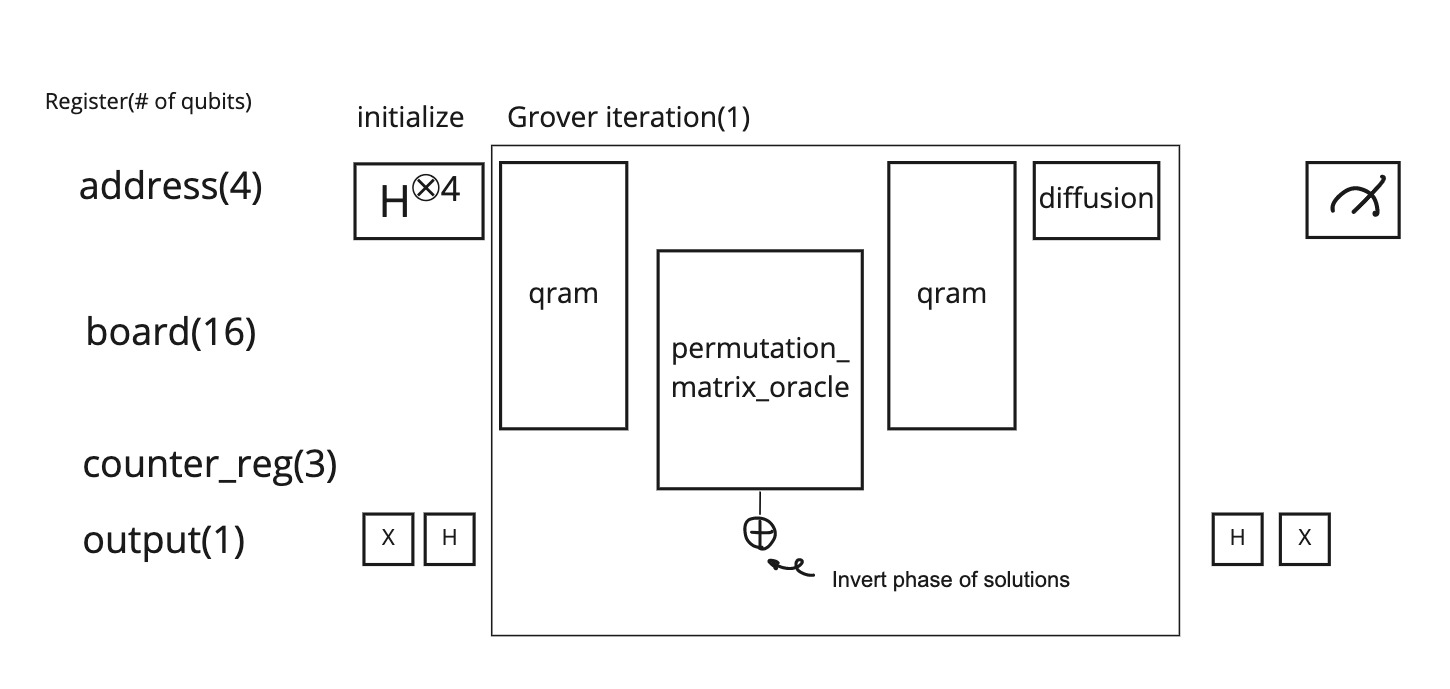

In [1]:
Image('final_circuit_2.png')

In [36]:
def week3_ans_func_2(problem_set):
    address = QuantumRegister(4, 'address')
    board = QuantumRegister(16, 'board')
    counter_reg = QuantumRegister(3, 'counter_reg')
    output = QuantumRegister(1, 'output')
    auxiliary = QuantumRegister(3, 'auxiliary')
    result = ClassicalRegister(4)

    qc = QuantumCircuit(address, board, counter_reg, output, auxiliary, result)

    #initialize
    qc.h(address[:])
    qc.x(output)
    qc.h(output)

    # Grover iteration
    for i in range(1):
        qram(qc, problem_set, address, board, auxiliary)
        permutation_matrix_oracle(qc, board, counter_reg, output, auxiliary)
        # Uncompute qram
        qram(qc, problem_set, address, board, auxiliary)
        # Call diffusion
        diffusion(qc, address, auxiliary)

    qc.h(output)
    qc.x(output)

    qc.measure(address, result)

    return qc

In [37]:
job = prepare_ex3(week3_ans_func_2)

Running week3_ans_func_2...
Computing cost...
Starting experiments. Please wait...
You may monitor the job (id: 5fd46a8880c762001a746b85) status and proceed to grading when it successfully completes.


In [38]:
result = job.result()
counts = result.get_counts()
# The following code is just to align the execution result.
original_problem_set_counts = [(p[0][::-1], p[1]) for p in sorted(counts[0].items(), key=lambda x:x[1], reverse=True)]
original_problem_set_counts

[('1010', 269),
 ('1001', 62),
 ('0010', 55),
 ('1101', 52),
 ('0000', 51),
 ('0100', 51),
 ('1111', 50),
 ('1100', 49),
 ('1000', 48),
 ('0001', 48),
 ('0111', 48),
 ('1110', 47),
 ('1011', 47),
 ('0110', 42),
 ('0011', 42),
 ('0101', 39)]

In [39]:
grade_ex3(job)

Grading your answer. Please wait...

Congratulations ðŸŽ‰! Your answer is correct.
Your score is 65488.
The lower your score the better!
Feel free to submit your answer.


The circuit for approach 2 successfully found the correct answer too! The circuit uses 27 qubits, and its cost is 
65,488. The cost is greatly smaller than that of approach 1 (It was 66,630,598!). 

### Summary
In this notebook, we introduced two approaches. One is based on solving the vertex cover with double-Grover, the other one is based on finding permutation matrices on a board. Both approaches can correctly find the answer. However, the difference in the cost is substantial. Approach 2 seems better than approach 1, but approach 2 has less flexibility than approach 1 (If the size of board or the number of laser shots we can shoot changed, we need to change its oracle a lot).

There are a lot of interesting and smart approachs to solve the exercise. If you are interested in other approaches, please check [top participants' submissions](https://github.com/qiskit-community/IBMQuantumChallenge2020/tree/main/submissions).

### Appendix: How to manually call `imbq_qasm_simulator` and additional sample problem sets

You can call `ibmq_qasm_simulator` with the following code. Note that you need to put your circuit into `qc`.

In [ ]:
from qiskit import IBMQ, execute

qc = "put your circuit here"

provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_qasm_simulator')
job = execute(qc, backend=backend, shots=1000, seed_simulator=12345, backend_options={"fusion_enable":True})


In [ ]:
result = job.result()
counts = result.get_counts()
# The following code is just to align the execution result.
original_problem_set_counts = [(p[0][::-1], p[1]) for p in sorted(counts[0].items(), key=lambda x:x[1], reverse=True)]
original_problem_set_counts

There are 30 additional problem sets in `sample_problem_set`. You can check whether your function works correctly with those problem sets and have fun.


In [47]:
import json

with open('sample_problem_set.json', 'r') as f:
    sample_problem_set = json.load(f)

In [54]:
print(len(sample_problem_set))
sample_problem_set['0']

30


[[['0', '0'], ['0', '1'], ['2', '2'], ['2', '3'], ['3', '1'], ['3', '2']],
 [['0', '1'], ['1', '1'], ['1', '2'], ['2', '0'], ['3', '0'], ['3', '2']],
 [['0', '1'], ['1', '0'], ['1', '2'], ['2', '1'], ['2', '3'], ['3', '3']],
 [['0', '1'], ['0', '2'], ['1', '0'], ['1', '3'], ['2', '0'], ['2', '1']],
 [['0', '0'], ['0', '3'], ['1', '2'], ['2', '1'], ['3', '0'], ['3', '2']],
 [['0', '0'], ['0', '3'], ['1', '0'], ['1', '2'], ['2', '3'], ['3', '2']],
 [['0', '1'], ['0', '2'], ['1', '1'], ['2', '0'], ['2', '2'], ['3', '0']],
 [['1', '2'], ['1', '3'], ['2', '0'], ['2', '1'], ['3', '0'], ['3', '3']],
 [['0', '2'], ['1', '1'], ['2', '2'], ['2', '3'], ['3', '1'], ['3', '3']],
 [['0', '3'], ['1', '2'], ['1', '3'], ['2', '1'], ['3', '1'], ['3', '2']],
 [['0', '0'], ['0', '1'], ['1', '2'], ['2', '0'], ['2', '3'], ['3', '2']],
 [['0', '0'], ['0', '2'], ['0', '3'], ['1', '2'], ['2', '3'], ['3', '0']],
 [['0', '0'], ['0', '2'], ['0', '3'], ['1', '3'], ['2', '2'], ['3', '0']],
 [['0', '0'], ['0', '1'],

## Honorary Mentions

The judges would like to make honorary mentions of the following teams which were able to achieve exceptional results.

**Top 3**
* First Place: **Hironari Nagayoshi** cost = 4004<br/>
This participant exploits the properties of the unsolvable boards, efficiently enumerating the 24 unsolvable configurations based the constraints.Â  Since merely enumerating the boards would exceed 28 qubits, the participant temporarily stores the information in a different qubit for each of the 8 boards. Aside from cost reduction, the simplicity and beauty of the code is worth mentioning.Â  Please check out the submitted solution.


* Second Place: **Adam Szady** cost = 4819<br/>
Using 32 board information generated by additional address qubit and C-SWAP gates, the participants adopt a novel approach to identify the correct board with 12 different checks. We tend to pursue simple data structures by reducing qubits, but the flexible idea of compacting the oracle by extending the qRAM space is a good reference. This was an excellent solution with many features other than the optimization of quantum gates, such as board visualization using HTML (display) and sophisticated code.



* Third Place: **Pulkit Sinha** cost = 5124<br/>
This participant notices and exploits the fact that when the number of stars is 6 and the board is 4Ã—4, the number of permutation matrix configurations that can exist at the same time is at most 2. Instead of multiplying the phase by -1 in the Oracle operator, it is multiplied by $e^{\frac 2 3 i\pi}$ when a permutation matrix configuration is included. This means that if two permutation matrix configurations are included, the phase will be multiplied by $e^{\frac 4 3 i\pi}$, resulting in an amplification of the solution by the same amount as in the case of $e^{\frac 2 3 i\pi}$. In addition, when checking the arrangement of the permutation matrices, the participant successfully reduces the number of gates by efficiently reusing the parts common to each permutation matrix, rather than checking all 24 combinations.Â 

<br/><br/>
The theme for this year's challenge was programming for the not-so-distant quantum future.
While we continued to explore the potential of Grover's algorithm following last year, we wanted to give foresight into near-future quantum systems requiring new programming techniques.Â  This is why we decided to incorporate exercises that utilizes qRAM to implement complex data structures which is an important technique for working on near-future quantum systems.


Given this notion, some of these exercises especially week 2 onward may have felt challenging. While uncertain if there will be enough people who can make it to the end, we were pleasantly surprised to see 227 people complete the final exercise. The ingenuity and technique shown by the participants in the final problem was truly impressive. Congratulations.


Solving all these exercises are of course a great accomplishment, but the real purpose of the Quantum Challenge, as we see it, is for participants to enjoy the learning process and to continue their journey to explore this fascinating field. We would like to express our heartfelt gratitude to each and every one of you who joined this challenge. We hope that you enjoyed the learning experience as much as we did.Â 


Till we meet again.

IBM Quantum Challenge Judges and Organizers